In [1]:
#Elizabeth Pieters
#Problem 1, Problem set 1
#Due Friday Sept 18

In [2]:
import numpy as np
import matplotlib.pyplot as mpl

In [3]:
#provides the first derivative given four surrounding points and delta
#given that the points are +/- 1 and 2 delta away
def deriv_fit(f2dminus, fdminus, fdplus, f2dplus, delta):
    return 1/(12*delta) * ( 8*(fdplus - fdminus) - f2dplus + f2dminus)
#makes general sense - if the next closest point is larger than the previous one, will be positive. 
#closer point outweights further.

In [4]:
### RESTRICTIONS ON DELTA ###

#MINIMUM DIFFERENCE
#first restriction on delta: has to be greater than or equal to 1+2**(-54).
#if not, it will not be able to take the difference from x, Python using float64 will not notice.
#Test:
z = np.array([1+2**(-24), 1+2**(-25), 1+2**(-26), 1+2**(-52), 1+2**(-53), 1+2**(-54), 1+2**(-70)])
print(z.dtype)         #will cast to float64 - aka a double, because python is trying to be nice.
print(z)               #thinks 1+2**(-53) and smaller is exactly 1
print(z - 1)           #doesn't register any difference for less than 1+2**(-53)

#As well, we subtract off f(x+d) - f(x-1), which difference ALSO has to be less than the minimum.
#So this will also depend on our choice of function, and our choice of x, the point that we expand around.

#for e^x function: say e^x - e^(x+2d) = 2**(-53), say x = 1, solve for d.
d53 = (np.log(np.exp(1) - 2**(-53)) - 1)/2
d52 = (np.log(np.exp(1) - 2**(-52)) - 1)/2
print(d53, d52)
#seems like deltas smaller than about 10**(-16) could cause too tiny differences in the exponential

#for e^0.01x function: say e^0.01x - e^(0.01(x+2d)) = 2**(-53), say x = 1, solve for d.
d53 = (np.log(np.exp(0.01) - 2**(-53)) - 0.01)/(2*0.01)
d52 = (np.log(np.exp(0.01) - 2**(-52)) - 0.01)/(2*0.01)
print(d53, d52)
#seems like deltas smaller than about 10**(-15) could cause too tiny differences in the exponential

#However, as delta grows larger, the Taylor series approximation we have made grows less valid.
#Therefore errors in approximating the first derivative grow as delta gets larger.
#This error will show up in the fifth derivative, as the fourth cancels in the same way the second did. This has
#a factor of delta**5 associated with it, so should be very small, negligible for delta < 10**(-5) or (-4).

float64
[1.00000006 1.00000003 1.00000001 1.         1.         1.
 1.        ]
[5.96046448e-08 2.98023224e-08 1.49011612e-08 2.22044605e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
0.0 -1.1102230246251565e-16
-5.377642775528102e-15 -1.6393136847980827e-14


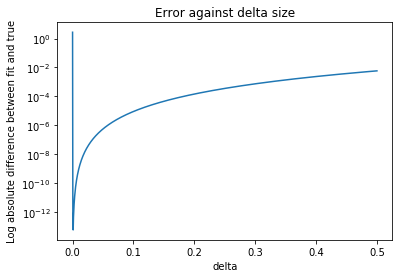

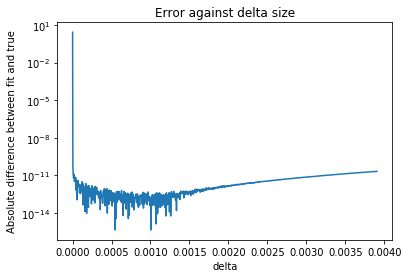

In [5]:
num_points = 1000
deltas = np.linspace(2**(-54), 2**(-1), num_points)
a = 1

f1d = np.exp(a) #d/dx of e^x = e^x
f1d_fit = np.zeros(num_points)

for ii, delta in enumerate(deltas):
    f = np.exp(a + np.array([-2*delta, -1*delta, 0, delta, 2*delta])) #4 points spaced around a
    f1d_fit[ii] = deriv_fit(f[0], f[1], f[3], f[4], delta) #don't send in f[2], just four surrounding points
#     print('True and fit first derivative : ', f1d, f1d_fit)
#     print('Delta : ', delta)
#     print('Difference : ', f1d-f1d_fit[ii])

mpl.figure()
mpl.plot(deltas, np.abs(f1d_fit - f1d))
mpl.yscale('log')
mpl.xlabel('delta')
mpl.ylabel('Log absolute difference between fit and true')
mpl.title('Error against delta size')
mpl.show()


deltas = np.linspace(2**(-54), 2**(-8), num_points) #look at smaller interval

f1d = np.exp(a) #d/dx of e^x = e^x
f1d_fit = np.zeros(num_points)

for ii, delta in enumerate(deltas):
    f = np.exp(a + np.array([-2*delta, -1*delta, 0, delta, 2*delta])) #4 points spaced around a
    f1d_fit[ii] = deriv_fit(f[0], f[1], f[3], f[4], delta) #don't send in f[2], just four surrounding points
#     print('True and fit first derivative : ', f1d, f1d_fit)
#     print('Delta : ', delta)
#     print('Difference : ', f1d-f1d_fit[ii])

mpl.figure()
mpl.plot(deltas, np.abs(f1d_fit - f1d))
mpl.yscale('log')
mpl.xlabel('delta')
mpl.ylabel('Absolute difference between fit and true')
mpl.title('Error against delta size')
mpl.show()

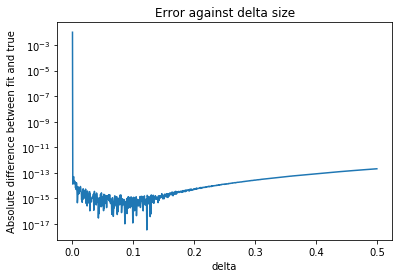

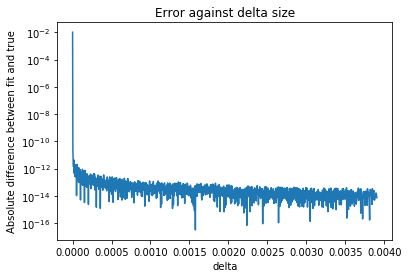

In [6]:
num_points = 1000
deltas = np.linspace(2**(-54), 2**(-1), num_points)
a = 1

f1d = 0.01*np.exp(0.01*a) #d/dx of e^0.01x = 0.01e^0.01x
f1d_fit = np.zeros(num_points)

for ii, delta in enumerate(deltas):
    f = np.exp(0.01*(a + np.array([-2*delta, -1*delta, 0, delta, 2*delta]))) #4 points spaced around a
    f1d_fit[ii] = deriv_fit(f[0], f[1], f[3], f[4], delta) #don't send in f[2], just four surrounding points
#     print('True and fit first derivative : ', f1d, f1d_fit)
#     print('Delta : ', delta)
#     print('Difference : ', f1d-f1d_fit[ii])

mpl.figure()
mpl.plot(deltas, np.abs(f1d_fit - f1d))
mpl.yscale('log')
mpl.xlabel('delta')
mpl.ylabel('Absolute difference between fit and true')
mpl.title('Error against delta size')
mpl.show()



deltas = np.linspace(2**(-54), 2**(-8), num_points) #look at smaller interval
f1d_fit = np.zeros(num_points)

for ii, delta in enumerate(deltas):
    f = np.exp(0.01*(a + np.array([-2*delta, -1*delta, 0, delta, 2*delta]))) #4 points spaced around a
    f1d_fit[ii] = deriv_fit(f[0], f[1], f[3], f[4], delta) #don't send in f[2], just four surrounding points
#     print('True and fit first derivative : ', f1d, f1d_fit)
#     print('Delta : ', delta)
#     print('Difference : ', f1d-f1d_fit[ii])

mpl.figure()
mpl.plot(deltas, np.abs(f1d_fit - f1d))
mpl.yscale('log')
mpl.xlabel('delta')
mpl.ylabel('Absolute difference between fit and true')
mpl.title('Error against delta size')
mpl.show()

In [7]:
#Evidently the derivative function exp(0.01x) changes more slowly than exp(x) and will tolerate
#a lot higher deltas before the Taylor approximation assumption starts losing its validity.

#What is really interesting is the ripples, displaying the computer struggling with how best to round and
#represent the calculations happening to compute the derivative. What is clear is that having the delta
#smaller than the smallest representable number in the computer severely compromises the calculation of the 
#derivative. After that point however, the error drops very rapidly and stays fairly low until delta is 
#~2*10^-3 for exp(x) and ~ 2*10^-1 for exp(0.01x) - note the factor of ~100 in the delta and the exponent, the
#slow changing exp(0.01x) allows the delta to grow larger before problems start.
#At that point, the function has grown large enough that the Taylor series begins to break down, and the error
#begins to rise more and more sharply.